# **Passos:**
1. Escolher 5 modelos/marcas de carros (Classes):
  * Fusca;
  * Ferrari;
  * Porsche;
  * Lamborghini;
  * Bugatti.


2. Criar o *dataset*:
  * Baixar as imagens e alocá-las no Google Drive (Filtrar algumas imagens sem sentido).


3. Criar/carregar o *dataloader*;


4. Criar a rede convolucional:
  * Topologia;


5. Treinar a Rede:
  * Testar o learning rate;
  * O tamanho da imagem que será usada (Optei por 100x100 pois notei que a rede aprendeu mais rápido do que quando foi 50x50);

6. Testar a rede:
  * Criar *dataset* de teste;
  * Imprimir os resultados.


##**Código:**

In [116]:
#Importação das funções e ferramentas que serão utilizadas ao longo do código
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms
import torch.functional as F


### **Etapa 2: Criando o dataset**

In [117]:
#Declaração do caminho dos arquivos no Drive.
main_dir = "/content/drive/My Drive/datasets/carros"
os.chdir(main_dir)

In [118]:
#Função responsável por baixar as imagens dos arquivos csv.
def download_images(main_dir, urls_filename):
    class_name = urls_filename.split('.')[-2]
    output_dir = main_dir + os.sep + class_name
    os.makedirs(output_dir, exist_ok=True)
    with open(urls_filename) as f:
        for url in f:
            img_filename = url.split('/')[-1].replace("\n", "")
            print(img_filename)
            response = urllib.request.urlopen(url)
            open(output_dir + '/' + img_filename, mode = "wb+").write(response.read())

In [ ]:
download_images(main_dir, 'fusca.csv') #Irá baixar as imagens de Fuscas.

51120907957_7bd34fe6cc_m.jpg
7894212458_342b1726f9_n.jpg
6870174090_f5e5643d0b_w.jpg
6870176682_e589ea2813_w.jpg
30453093662_a3c71c1060_n.jpg
29936177193_bc2373042c_n.jpg
30533809506_08b60a5974_n.jpg
29938418824_ca1718e6d3_n.jpg
29938460764_c82dc68162_n.jpg
30482003911_19affe324f_n.jpg
29936126993_cd886591c8_n.jpg
29938588114_5d98909065_n.jpg
30533768676_477d546683_n.jpg
30482103711_812659555b_n.jpg
29938485614_6243b73b43_n.jpg
30533755766_1386c5faaf_n.jpg
30270903250_34d34f0c36_n.jpg
30482036351_972c50809c_n.jpg
30481982121_8b5279e33e_n.jpg
30481973491_ed9ae5fa3b_n.jpg
30270803450_3f3cc8fc14_n.jpg
29936118043_51829eb12a_n.jpg
16667418677_ea2cee8ca7_n.jpg
2406139441_457a6d0b5a_m.jpg
16497211855_8879895282_n.jpg
42592860844_9e832b4851_n.jpg
50127129402_328abd6b48_w.jpg
50915797292_3b5defff13_m.jpg
51203820255_cf2e39fe97_w.jpg
51012938667_ce18061513_m.jpg
9547086461_33fa64ae5d_w.jpg
51117422544_08774f8d33_n.jpg
4448275324_2ff1c44d9c_n.jpg
18900896443_0cbb41b715_n.jpg
27682550712_4e90e685

In [ ]:
download_images(main_dir, 'ferrari.csv') #Irá baixar as imagens de Ferraris.

16766764156_64d42cb0dd_m.jpg
29397290605_e6c2aaa8d4_n.jpg
7917171056_de14e24931_n.jpg
6393264445_f11b1778ce_n.jpg
13514257513_3cb455946d_n.jpg
10562830456_1d6e0e2869_n.jpg
22793787316_9d79effd52_n.jpg
6160397610_8d51ba02ef_n.jpg
12537199335_282b36fcd8_n.jpg
28238476252_b138af45b6_n.jpg
10998533014_e7523072f4_n.jpg
6810949444_fd9c9aa402_n.jpg
6965698741_365cf44310_n.jpg
10695900495_9a7e8bbd2f_n.jpg
28163456472_b514700bdf_n.jpg
7147412205_a88ff2975d_n.jpg
8258222962_0af02947ce_m.jpg
15051132798_5a75d4cc6b_n.jpg
6832129851_61ddfe2208_m.jpg
6473151683_5b72341d7c_n.jpg
7415069034_e22eab1e8c_n.jpg
11377792125_b430f9d274_n.jpg
13912739835_18e6ac2453_n.jpg
12951398663_daa8a35214_n.jpg
8614223577_6f2e13111c_n.jpg
8237797651_06138a9139_m.jpg
15110655475_227f0a217f_m.jpg
6231592928_b1593f095a_n.jpg
6409466973_e1c543baac_n.jpg
10912235444_453255157f_n.jpg
5448519587_5a3446fbd6_n.jpg
5385526295_4cbc5ca61c_n.jpg
9410588382_f985302370_w.jpg
4959362111_ba756a98c4_w.jpg
12272433165_45ae9e3d77_w.jpg
151

In [ ]:
download_images(main_dir,'porsche.csv') #Irá baixar as imagens de Porsches.

49801447148_7ca0c00cf1_n.jpg
50543498698_8531b8b30d_n.jpg
49801445763_135c17da89_n.jpg
50544223681_c4f8a3ebce_m.jpg
50544365147_f5c09a8481_w.jpg
51188447747_4bf3a17f5f_w.jpg
32479018207_baf7ea29c9_w.jpg
51189922509_3bdb32238d_n.jpg
51174115392_58bc2c90f6_n.jpg
49802303982_c959779a48_n.jpg
51190221665_8b8f56ea82_n.jpg
5868899836_f8bc42c881_w.jpg
49553339537_5711e37013_w.jpg
50620014388_0edf8ec203_n.jpg
41891038865_a4540fd155_n.jpg
34252372330_e1973f732e.jpg
49841070333_594e6a9777_n.jpg
49393935166_24a71545ee_n.jpg
49393933801_16c9b5de1d_n.jpg
47858743621_d88326f7d0_n.jpg
50544223506_aefd7c4a07_n.jpg
49588410306_fa3fbe65a9_n.jpg
16561096508_8d66427434_n.jpg
49841067628_0846c3cd59_m.jpg
45376974235_2bfb9ef35c_n.jpg
49588410551_2b26dc5a48_w.jpg
49553096846_72839be695_w.jpg
49393934411_6365060677_n.jpg
49841070473_452bd8c84c_n.jpg
27285868123_c1b956782a.jpg
40908165170_f3a2bff9a8_w.jpg
51276783371_e5561904c0_n.jpg
51276783651_5766ee87b4_n.jpg
33536371018_fabc585440_n.jpg
49841909272_b2657aa

In [ ]:
download_images(main_dir,'lamborghini.csv') #Irá baixar as imagens de Lamborghinis.

49588874767_d7eb6c4b5a_n.jpg
5065063356_a91f1ecd34_w.jpg
5064452905_0b113135f9_w.jpg
8300767267_337fe24263_n.jpg
49293703052_f5d0a81120_n.jpg
2105183521_01a44a7412_n.jpg
49293507226_fbc08519a4_n.jpg
49293017018_d2d85f3f10_n.jpg
43338802652_105520d4e4_m.jpg
49293702867_c1e8290b6c_n.jpg
49293018553_408e228bb5_n.jpg
5065060054_9e7f202f43_n.jpg
28003977209_7b724c8022_n.jpg
5064443243_4e630a3a72_n.jpg
49293507796_a6a4c3a92e_n.jpg
36713097506_ba0431b754_n.jpg
36760268695_efda23c801_n.jpg
50899027946_f4d00ea09d_m.jpg
42482485495_42b091941e_n.jpg
5430539928_99cc961ecc_n.jpg
49293018668_78154c4ab1.jpg
4829183823_72dde9a495_n.jpg
37782067006_81605c810a_n.jpg
49588874802_a8c80742ec_m.jpg
6915063003_66c3062d61_n.jpg
36590443162_6ed62792b4_n.jpg
43338803752_340dae97f8_m.jpg
36574802604_f41f1e4e63_n.jpg
38134288042_b736a3c53e_n.jpg
43386804771_8438b921a7_m.jpg
36363663630_5d81af7858_w.jpg
49293507421_9f7f794bb2.jpg
37329795641_51c1d738e2_w.jpg
9678135618_f618158159_n.jpg
9678113516_766ec63976_n.jpg


In [ ]:
download_images(main_dir,'bugatti.csv') #Irá baixar as imagens de Bugattis.

42485121012_3063c0d26c_w.jpg
42537037001_eca9db414a_w.jpg
16198071395_586c52e775_m.jpg
6982846960_144f58828c_n.jpg
41814046254_722ab85cde_w.jpg
42537064931_c8c766235c_w.jpg
41634669165_b79bc1d801_w.jpg
50660483086_364ca7ca6e_n.jpg
27666258817_c251cb03ec_w.jpg
42537059991_8b020a9039_w.jpg
16012275407_0a914ed6d0_n.jpg
27666259817_df7128494f_w.jpg
27666264657_5eb358ddf2_w.jpg
41634682635_d64abd006e_w.jpg
42537041381_5c6b858e9a_w.jpg
27666268827_dc24828652_w.jpg
42485116342_a035960ff1_w.jpg
41634677415_7644ddce69_w.jpg
27666263467_626ff194cf_w.jpg
42537054301_c0d6cecc7e_w.jpg
24873537117_5cb08cf7f3_w.jpg
5553375939_11d2cdec30_w.jpg
38844667355_5942284c24_n.jpg
42485105012_aafed39412_w.jpg
28663674008_686b8b9d36_w.jpg
3662683318_812fd1d748_n.jpg
41814042364_e633978aa3_w.jpg
41634679655_220e790451_w.jpg
38940874415_b86cd14dec_m.jpg
38940875315_8240d31349_m.jpg
39742806991_5ba0706c8e_w.jpg
39742805841_92b41937f7_n.jpg
38844668725_4933dd9f10_w.jpg
49961393641_2c9cc84a6f_n.jpg
39839606041_f2ec4

###**Etapa 3: Criando o *dataloader* e carregando os dados** 

In [119]:
def image_loader(img):
    return Image.open(img)

#Dá para escrever usando lambda, mas entendo melhor assim.

In [120]:
#Função de normalização das imagens. As Redes que normalizam as imagens tendem a convergir melhor e mais rápido
class ToNorm(object):
    def __call__(self, img):
        mean = torch.mean(img)
        std  = torch.std(img)
        return (img - mean) / std



transform = transforms.Compose([transforms.Resize((100, 100)),
                                transforms.ToTensor(),
                                ToNorm()
                            ])

#O comando transforms.Normalize() faz algo parecido, em relação a normalização, contudo tem os parêmetros setados para todas as imagens.
#Nesse caso, o desvio padrão foi usado como paramêtro para a normalização.
#Todas as imagens estão sendo reduzidas para 100x100.

In [121]:
dataset = torchvision.datasets.DatasetFolder(main_dir+'/imgs', loader = image_loader, extensions = 'jpg', transform = transform )
#"Carregando" as imagens para o dataset

In [122]:
dataset.classes #Verificando se todas as 5 classes estão listadas dentro do dataset.

['bugatti', 'ferrari', 'fusca', 'lamborghini', 'porsche']

In [123]:
dl = DataLoader(dataset, batch_size = 10) #Criando batch de 10 em 10.
data,class_att = next(iter(dl)) #Carregando os batches.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


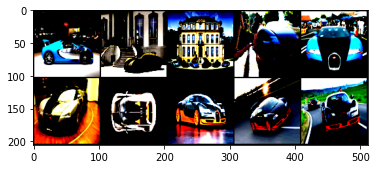

In [124]:
grid_img = torchvision.utils.make_grid(data, nrow = 5) 
plt.imshow(grid_img.permute(1, 2, 0)) #Grid das imagens para visualizarmos os batches, não influência em nada.

###**Etapa 3: Criando a rede convolucional:**

In [125]:
#Modelo de Rede Neural Convolucional:
class Rede_Con(nn.Module):
    def __init__(self):
        super(Rede_Con, self).__init__()
        self.backbone = nn.Sequential(
            #Canais de entrada, canais de saída e kernel (Tamanho da convolução).
            nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5),
            #Função de Ativação (Relu).
            nn.ReLU(),
            nn.MaxPool2d(stride=2, kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            #Função de Ativação (É muito importante não esquecer da segunda Relu).
            nn.ReLU(),
            nn.MaxPool2d(stride=2, kernel_size=2),
            #Converte o cubo, abstrato, em um vetor de 7744 posições.
            nn.Flatten()
        );
        self.classifier = nn.Sequential(
            #Fully connected e depois outra Relu.
            #Os 120 perceptrons iniciais irão receber os dados, individualmente, das 7744 entradas (Flattens). 
            nn.Linear(7744,120),
            nn.ReLU(),
            #Os 84 perceptrons da camada do meio se conectam aos 120 iniciais.
            nn.Linear(120,84),
            nn.ReLU(),
            #Por fim, os 84 perceptrons do meio se ligam aos 5 finais.
            #ATENÇÃO, a quantidade de perceptrons finais devem ser equivalentes ao número de classes.
            #Dessa forma, como tenho 5 classes, irei utilizar cinco perceptrons na camada final. 
            nn.Linear(84,5) 
        )
    def forward(self, x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x

In [126]:
#Criando o objeto da classe Rede_Con. Basicamente, o obejto que possui a rede. 
model = Rede_Con() 

In [ ]:
#Inicialização de Kaiming sendo aplicado a todos os nn.Linear e nn.Conv2d.
for p in model.modules():
    if isinstance(p, nn.Linear) or isinstance(p, nn.Conv2d):
        nn.init.kaiming_normal_(p.weight, mode = 'fan_out', nonlinearity = 'relu')

#A principal função da Inicilização de Kaiming é melhorar o desenpenho do modelo, a partir da segunda iteração.
#Kaiming pode ser problemático na primeira iteração do modelo.

In [127]:
import torchsummary
#Seve apenas para visualização interna do modelo. Não interfere em nada. 

In [128]:
torchsummary.summary(model,(3,100,100),device='cpu') #Detalha o uso de memória e desenvolvimento do modelo.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 96, 96]             456
              ReLU-2            [-1, 6, 96, 96]               0
         MaxPool2d-3            [-1, 6, 48, 48]               0
            Conv2d-4           [-1, 16, 44, 44]           2,416
              ReLU-5           [-1, 16, 44, 44]               0
         MaxPool2d-6           [-1, 16, 22, 22]               0
           Flatten-7                 [-1, 7744]               0
            Linear-8                  [-1, 120]         929,400
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 5]             425
Total params: 942,861
Trainable params: 942,861
Non-trainable params: 0
-------------------------------

### **Etapa 5: Treinando a Rede**

In [129]:
import torch.optim as optim #Importando o otimizador do Pytorch.

In [130]:
criterion = nn.CrossEntropyLoss() #CrossEntropy aplicado a Loss.
opt = optim.SGD(model.parameters(), lr = 0.01) #Gradiente Estocástico.
#Lr é o learning rate, em suma, a taxa de aprendizado.  

In [131]:
#Se a GPU está disponível, rode nela. Se não, continua na CPU.
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu') 

In [132]:
model.to(device) #Inserindo o modelo na GPU

Rede_Con(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=7744, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=5, bias=True)
  )
)

In [133]:
epochs = 100 #Numero de iterações, basicamente o número de treinos.
for epoch in range(epochs):
    model.train() #Diretriz de treino, diferente da model.eval() que a diretriz para teste.
    #A model.train() possui algumas funções "ocultas" de otimização próprias.
    lloss = []
    for x,y in dl:
        x = x.to(device) #Direcionando Valor para a GPU
        y = y.to(device) #Direcionando Valor para a GPU
        pred = model(x)  #Executa o modelo
        closs = criterion(pred, y) #Calcula a Loss (A Loss é tudo para nós)
        closs.backward() #Calcula os gradientes
        opt.step() #Atualiza os pesos
        opt.zero_grad() #Zera os gradientes para iniciar o loop de novo
        lloss.append(closs.item())
    print(np.mean(lloss))

1.5140056494743592
1.4250306198673863
1.383967450068843
1.3473461741401302
1.2965176848153914
1.2883602601866568
1.281956531347767
1.249327688688232
1.233916614324816
1.198449395596981
1.1862903071507331
1.1423459423165168
1.0941132144822228
1.075741784466851
1.0239146097052483
0.986000279745748
0.9478680431362121
0.9102954689052797
0.8493783788815621
0.7990115844314137
0.7589331942219888
0.6993374924565996
0.6338735367922533
0.5568854210808152
0.5259722161647533
0.44839362816644773
0.3929120368294178
0.329402291690067
0.33028561786546384
0.27514541632271794
0.252271133274154
0.2830169192477771
0.306607853572029
0.21668244143908058
0.23855581393484265
0.22374669442785577
0.3501246025229369
0.3641630770908969
0.2140720955907337
0.1673217114181288
0.15855006605476862
0.156742324714639
0.11887531994556587
0.09877093049304207
0.09302090259359008
0.18072235747346102
0.1492538491508786
0.11730946297956829
0.10543821179383103
0.21226810290989218
0.2043277390067458
0.12462691613472998
0.068393

### **Etapa 6: Testando a Rede**


Optei por criar novas funções dedicadas ao *dataset* de teste, mesmo que idênticas as de criação do dataset de treino.

In [134]:
def image_loader_Test(img):
    return Image.open(img)

#Função de normalização das imagens. Redes que normalizam as imagens tendem a convergir melhor e mais rápido.
class ToNorm(object):
    def __call__(self, img):
        mean = torch.mean(img)
        std  = torch.std(img)
        return (img - mean) / std



transform = transforms.Compose([transforms.Resize((100, 100)),
                                transforms.ToTensor(),
                                ToNorm()
                            ])

#O comando transforms.Normalize() faz algo parecido, em relação a normalização, contudo tem os parêmetros setados para todas as imagens.
#Nesse caso, o desvio padrão foi usado como paramêtro para a normalização.
#Todas as imagens estão sendo reduzidas para 100x100.



In [135]:
dataset_Test = torchvision.datasets.DatasetFolder(main_dir+'/test_imgs', loader = image_loader_Test, extensions = 'jpg', transform = transform )
#"Carregando" as imagens para o dataset de teste.

In [136]:
dl_Test = DataLoader(dataset_Test, batch_size = 20) #Criando batch, diferentemente dos de treino, esses vão de 20 em 20.
data_Test,class_att = next(iter(dl_Test)) #Carregando os batches de teste.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


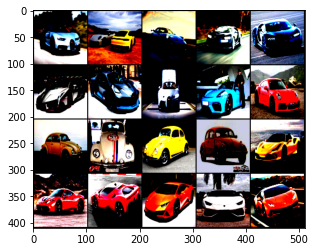

In [137]:
grid_img = torchvision.utils.make_grid(data_Test, nrow = 5) 
plt.imshow(grid_img.permute(1, 2, 0))

In [138]:
#Se a GPU está disponível, rode nela. Se não, continua na CPU.
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu') 

In [139]:
model.to(device) #Inserindo o modelo na GPU

Rede_Con(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=7744, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=5, bias=True)
  )
)

In [140]:
with torch.no_grad():    
    #Obtenho o nome de todas as classes da rede (Os carros)
    indice_para_classes = dataset.classes 
    #Dicionário que irá receber a probalidade, calculada na rede, de ser determinados carros.
    probabilidade_classes = dict() 
    
    model.eval() 
    #Diretriz de teste, algumas funções "ocultas" de otimização serão desativadas.
    #Dessa forma, a rede é testada, literalmente, apenas com o que já sabe.

    for x,y in dl_Test:

        x = x.to(device)

        # plt.imshow(np.squeeze(x)) --> Tentativa falha de plotar a imagem que está sendo analisada.
        

        pred = model(x)  #Executa o modelo.


        # O torch.exp converte a probabilidade de log para a probabilidade linear.    
        ps = torch.exp(pred)

        # O topk retornará os maiores valores de k do tensor.
        topk, topclass = ps.topk(5, dim=1)
        
        for i in range(5):
            probabilidade_classes[indice_para_classes[topclass.cpu().numpy()[0][i]]] = topk.cpu().numpy()[0][i]
        print(probabilidade_classes) 
        # Mostra a probabilidade de ser cada uma das classes.
        # A maior probabilidade indica qual será o carro aos olhos da rede.
      
      
     

{'ferrari': 4.2949505, 'lamborghini': 1.4181828, 'bugatti': 1.2847267, 'porsche': 0.5886128, 'fusca': 0.12727448}
{'ferrari': 2.0788259e-05, 'lamborghini': 15014.872, 'bugatti': 9.8741865, 'porsche': 0.0022227138, 'fusca': 1221.3107}
{'ferrari': 0.20407626, 'lamborghini': 764.91766, 'bugatti': 1.5900121, 'porsche': 0.020235443, 'fusca': 0.35842887}
{'ferrari': 1.0146133e-05, 'lamborghini': 156.46161, 'bugatti': 0.017117178, 'porsche': 1663425.2, 'fusca': 8.935902}
{'ferrari': 0.009368417, 'lamborghini': 4.3680453, 'bugatti': 440.56058, 'porsche': 0.20148812, 'fusca': 4.638021}
